In [1]:
import os
import sys

# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
save_path = '/home/hbkoziel/pyfesom/figures/Arc12/FINAL2/'
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#from matplotlib import cm
#sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
#import cmocean as cmap
#from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import time
import seaborn as sns

import xarray as xr
import pandas as pd

No joblib
no cmocean


In [3]:
df_eu_yr = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_yearly')
df_am_yr = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_yearly')
df_sl_yr = pd.read_pickle(wd_path+'codes/sertemp/Slope_basin_yearly')

In [4]:
df_eu_mo = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_monthly')
df_am_mo = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_monthly')
df_sl_mo = pd.read_pickle(wd_path+'codes/sertemp/Slope_basin_monthly')

In [7]:
df_eu_mar = df_eu_mo[df_eu_mo.index.month == 3]
df_am_mar = df_am_mo[df_am_mo.index.month == 3]
df_sl_mar = df_sl_mo[df_am_mo.index.month == 3]

df_eu_sept = df_eu_mo[df_eu_mo.index.month == 9]
df_am_sept = df_am_mo[df_am_mo.index.month == 9]
df_sl_sept = df_sl_mo[df_am_mo.index.month == 9]

df_eu_yearlymean = df_eu_mo.resample('Y').mean()
df_am_yearlymean = df_am_mo.resample('Y').mean()
df_sl_yearlymean = df_sl_mo.resample('Y').mean()

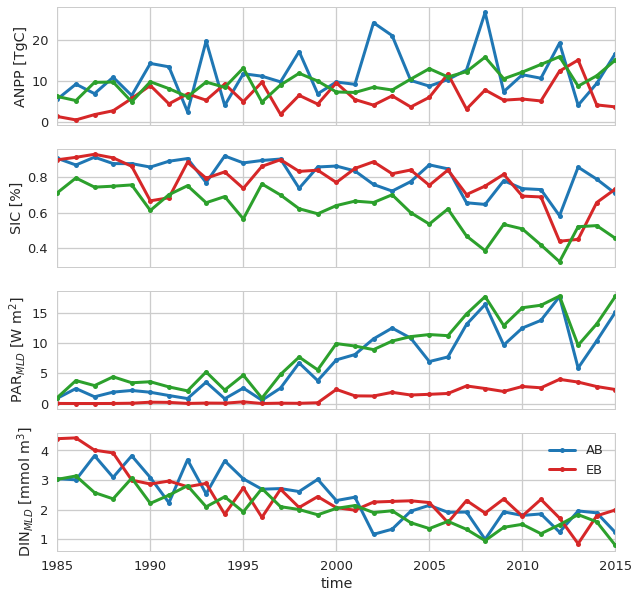

In [9]:
figsize = (10, 10)

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=figsize, constrained_layout=False, sharex=True)

plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-talk')
df_am_yr['ANPP'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:blue', zorder =1)
df_eu_yr['ANPP'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:red', zorder =2)
df_sl_yr['ANPP'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:green', zorder =3)
ax1.set_ylabel('ANPP [TgC]')
#ax1.set_title('Arctic Eurasian basin')

df_am_sept['SIC'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['SIC'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:red', zorder =2)
df_sl_sept['SIC'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:green', zorder =3)
ax2.set_ylabel('SIC [%]')

df_am_sept['PARmld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['PARmld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:red', zorder =2)
df_sl_sept['PARmld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:green', zorder =3)
ax3.set_ylabel('PAR$_{MLD}$ [W m$^{2}$]')

df_am_sept['DINmld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['DINmld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:red', zorder =2)
df_sl_sept['DINmld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:green', zorder =3)
ax4.set_ylabel('DIN$_{MLD}$ [mmol m$^{3}$]')

plt.legend({'EB','AB'})
# df3_yearly_am.plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2)
# plt.ylabel('area [m$^{2}$]')
# plt.title('Arctic Amerasian basin')

plt.savefig(save_path+'FIG2.png', dpi = 300, bbox_inches='tight') 
plt.savefig(save_path+'FIG2.pdf', dpi = 300, bbox_inches='tight') 